#Задача 3. Многоклассовая классификация и множественная классификация/регрессия
Хастиев Шамиль Ринатович, 22.М08-мм

- [x] Изучите [возможности sklearn](https://scikit-learn.org/stable/modules/multiclass.html#multiclass-classification) для решения задач **Multiclass classification**, **Multilabel classification** и **Multioutput Regression**. Основные компоненты библиотеки указаны на рисунке ниже.
![multi_org_chart](https://scikit-learn.org/stable/_images/multi_org_chart.png)

- [x] Найдите данные, на которых можно решить задачу **Multiclass classification** (классификация с более чем двумя классами). В крайнем случае преобразуйте данные, предназначенные для другой задачи.
- [x] Выполнить разведочный анализ (**EDA**), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи.
- [x] При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (**Feature Engineering**).
- [x] Используя стратегии **OneVsRest**, **OneVsOne** и **OutputCode** решите задачу **Multiclass classification** для каждого из пройденных базового алгоритма классификации (**logistic regression, svm, knn, naive bayes, decision tree**). При обучении использовать **подбор гиперпараметров**, **кросс-валидацию** и при необходимости **масштабирование данных**, добиться наилучшего качества предсказания.
- [x] Замерить время обучения каждой модели для каждой стратегии.
- [x] Для оценки качества моделей используйте метрику **AUC-ROC**.
- [x] Сравнить время обучения и качество всех моделей и всех стратегий. Сделать выводы.
- [ ] (**+3 балла**) Повторить все пункты для задачи **Multilabel classification** (классификация с несколькими целевыми признаками, например, бинарными). В качестве стратегий попробовать **MultiOutputClassifier** и **ClassifierChain**.
- [x] (**+2 балла**) Повторить все пункты для задачи **Multioutput Regression** (регрессия с несколькими целевыми признаками, вещественными). Модель попробовать как минимум одну: **Ridge**. В качестве стратегий попробовать **MultiOutputRegressor** и **RegressorChain**. В качестве метрики использовать **R2**.

## Data exploration
- [x] Найдите данные, на которых можно решить задачу **Multiclass classification** (классификация с более чем двумя классами). В крайнем случае преобразуйте данные, предназначенные для другой задачи.
- [x] Выполнить разведочный анализ (**EDA**), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи.
- [x] При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (**Feature Engineering**).

В качестве датасета я выбрал датасет iris

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets

In [15]:
ir = datasets.load_iris()
X = ir.data
y = ir.target
df = pd.DataFrame(data=X, columns=('sepal_length', 'sepal_width','petal_length', 'petal_width'))
df['species'] = y
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [17]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated

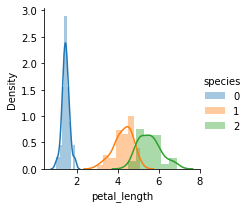

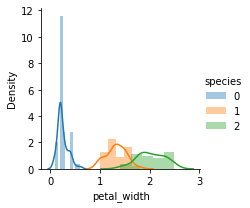

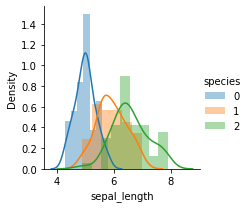

In [19]:
sns.FacetGrid(df,hue="species",size=3).map(sns.distplot,"petal_length").add_legend()
sns.FacetGrid(df,hue="species",size=3).map(sns.distplot,"petal_width").add_legend()
sns.FacetGrid(df,hue="species",size=3).map(sns.distplot,"sepal_length").add_legend()
plt.show()

petal_length явно выделяет первый класс цветов

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


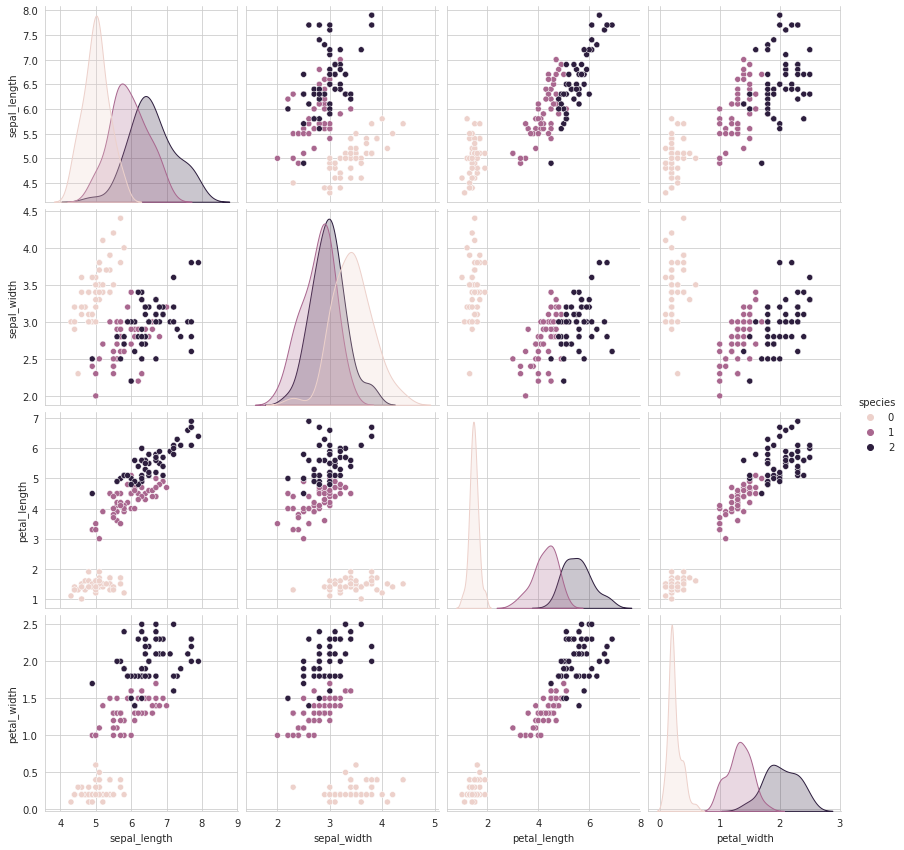

In [21]:
sns.set_style("whitegrid")
sns.pairplot(df,hue="species",size=3);
plt.show()

все классы явно разделимы, перейдем к обучению без какого либо препроцессинга

##  Обучение
- [x] Используя стратегии **OneVsRest**, **OneVsOne** и **OutputCode** решите задачу **Multiclass classification** для каждого из пройденных базового алгоритма классификации (**logistic regression, svm, knn, naive bayes, decision tree**). При обучении использовать **подбор гиперпараметров**, **кросс-валидацию** и при необходимости **масштабирование данных**, добиться наилучшего качества предсказания.
- [x] Замерить время обучения каждой модели для каждой стратегии.
- [x] Для оценки качества моделей используйте метрику **AUC-ROC**.
- [x] Сравнить время обучения и качество всех моделей и всех стратегий. Сделать выводы.

In [36]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['species'])
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

models = (
    (LogisticRegression, {'max_iter': [100, 1000], 'C': [1, 0.5]}),
    (KNeighborsClassifier, {'n_neighbors': [5, 50]}), 
    (SVC, {'C':[1, 0.5], 'probability':[True]}),
    (GaussianNB, {}),
    (DecisionTreeClassifier, {'splitter': ["best", "random"]})
)

In [49]:
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import GridSearchCV
params = []

for model in models:
    sh = GridSearchCV(model[0](), model[1], cv=5, scoring="roc_auc_ovr",error_score="raise",
                             ).fit(X_train_scaled, y_train)
    params.append(sh.best_params_)

In [56]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier, OutputCodeClassifier
import time

timee = {}
timee['One'] = dict()
score = {}
score['One'] = dict()
for i, p in enumerate(params):
    model = OneVsOneClassifier(models[i][0](**p)) 
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    spend_time = time.time() - start_time
    name = str(models[i][0]().__class__.__name__)
    score['One'][name] = model.score(X_test_scaled, y_test)
    timee['One'][name] = spend_time
score

{'One': {'LogisticRegression': 0.92,
  'KNeighborsClassifier': 0.92,
  'SVC': 0.94,
  'GaussianNB': 0.92,
  'DecisionTreeClassifier': 0.92}}

In [57]:
score['Rest'] = dict()
timee['Rest'] = dict()
for i, p in enumerate(params):
    model = OneVsRestClassifier(models[i][0](**p)) 
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    spend_time = time.time() - start_time
    name = str(models[i][0]().__class__.__name__)
    score['Rest'][name] = model.score(X_test_scaled, y_test)
    timee['Rest'][name] = spend_time
score['Rest']

{'LogisticRegression': 0.84,
 'KNeighborsClassifier': 0.92,
 'SVC': 0.94,
 'GaussianNB': 0.9,
 'DecisionTreeClassifier': 0.92}

In [58]:
score['OutputCode'] = dict()
timee['OutputCode'] = dict()
for i, p in enumerate(params):
    model = OutputCodeClassifier(models[i][0](**p)) 
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    spend_time = time.time() - start_time
    name = str(models[i][0]().__class__.__name__)
    score['OutputCode'][name] = model.score(X_test_scaled, y_test)
    timee['OutputCode'][name] = spend_time
score['OutputCode']

{'LogisticRegression': 0.66,
 'KNeighborsClassifier': 0.92,
 'SVC': 0.66,
 'GaussianNB': 0.84,
 'DecisionTreeClassifier': 0.96}

## Сравнение
- [x] Сравнить время обучения и качество всех моделей и всех стратегий. Сделать выводы.


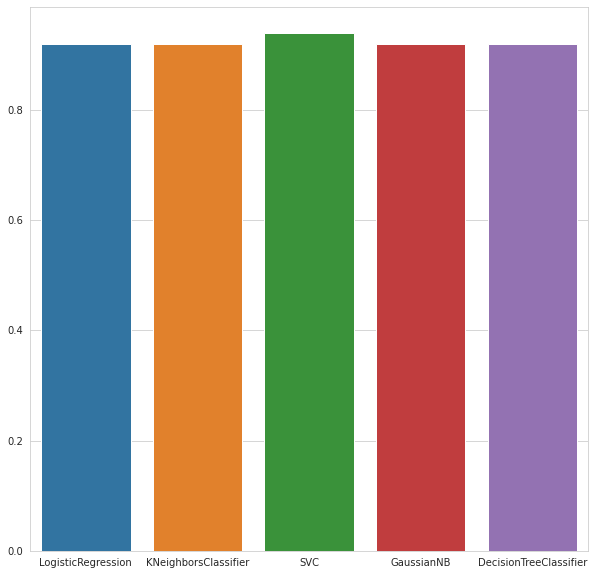

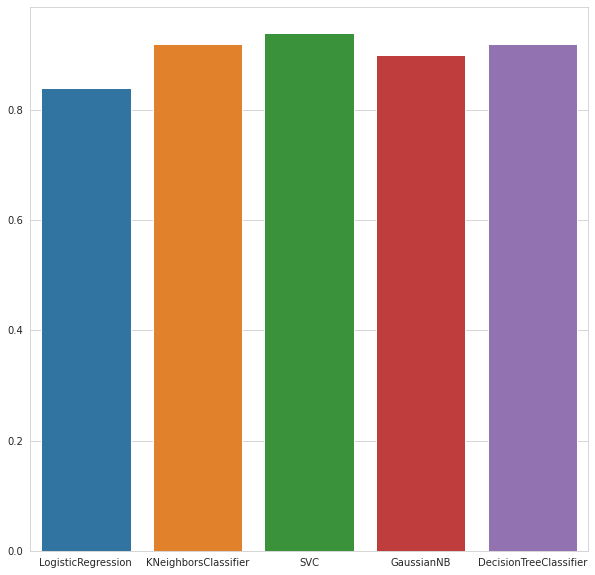

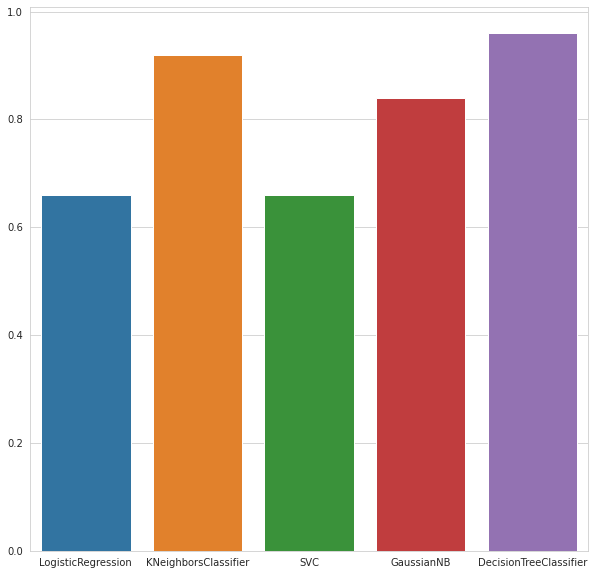

In [71]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
p1 = sns.barplot(x=list(score['One'].keys()), y=list(score['One'].values()))
plt.show()

p2 = sns.barplot(x=list(score['Rest'].keys()), y=list(score['Rest'].values()))
plt.show()

p3 = sns.barplot(x=list(score['OutputCode'].keys()), y=list(score['OutputCode'].values()))
plt.show()

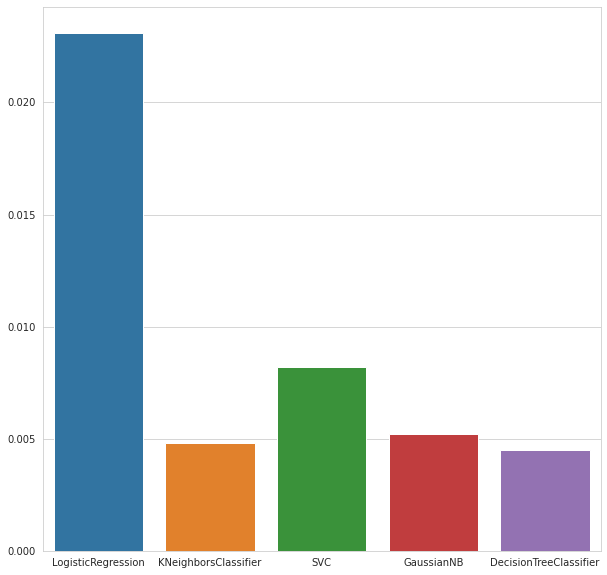

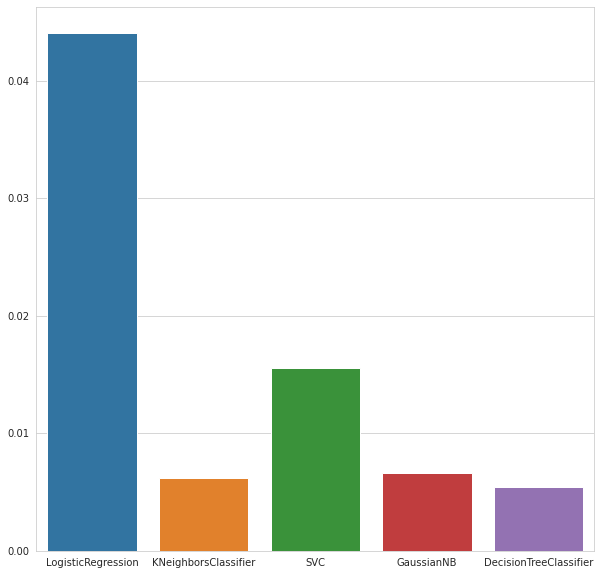

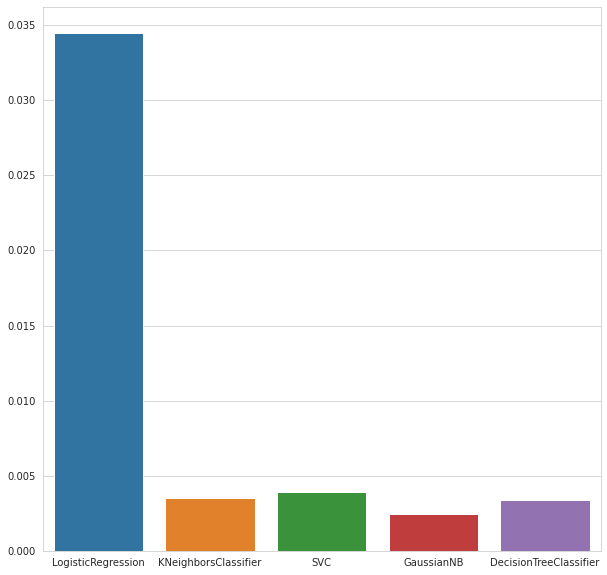

In [72]:
p1 = sns.barplot(x=list(timee['One'].keys()), y=list(timee['One'].values()))
plt.show()

p2 = sns.barplot(x=list(timee['Rest'].keys()), y=list(timee['Rest'].values()))
plt.show()

p3 = sns.barplot(x=list(timee['OutputCode'].keys()), y=list(timee['OutputCode'].values()))
plt.show()

В среднем самой быстрой и точной оказалась стратегия OneVsOne
Однако самой точной используя метод DecisionTreeClassifier является стратегия OutputCode однако на других классификаторах она показала результат куда хуже остальных. 

## Multioutput Regression
(**+2 балла**) Повторить все пункты для задачи **Multioutput Regression** (регрессия с несколькими целевыми признаками, вещественными). Модель попробовать как минимум одну: **Ridge**. В качестве стратегий попробовать **MultiOutputRegressor** и **RegressorChain**. В качестве метрики использовать **R2**. \\
В качесте датасета будем использовать тот же самый но предсказывать petal_length и sepal_width

In [88]:
X = df.drop(columns=['petal_length', 'sepal_width'])
y = df[['petal_length', 'sepal_width']]
X = pd.concat([X, pd.get_dummies(df['species'])],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [89]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
params = []
models = (
    (Ridge, {'alpha': [1, 0.5]}),
    (RandomForestRegressor, {'max_depth': [5, 10]})
)
for model in models:
    sh = GridSearchCV(model[0](), model[1], cv=5, scoring="r2",error_score="raise",
                             ).fit(X_train_scaled, y_train)
    params.append(sh.best_params_)


In [90]:
from sklearn.multioutput import RegressorChain, MultiOutputRegressor
timee = {}
timee['MultiOutputRegressor'] = dict()
score = {}
score['MultiOutputRegressor'] = dict()
for i, p in enumerate(params):
    model = MultiOutputRegressor(models[i][0](**p)) 
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    spend_time = time.time() - start_time
    name = str(models[i][0]().__class__.__name__)
    score['MultiOutputRegressor'][name] = model.score(X_test_scaled, y_test)
    timee['MultiOutputRegressor'][name] = spend_time
score

{'MultiOutputRegressor': {'Ridge': 0.7611186805643484,
  'RandomForestRegressor': 0.7156753686445481}}

In [91]:
score['RegressorChain'] = dict()
timee['RegressorChain'] = dict()
for i, p in enumerate(params):
    model = RegressorChain(models[i][0](**p)) 
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    spend_time = time.time() - start_time
    name = str(models[i][0]().__class__.__name__)
    score['RegressorChain'][name] = model.score(X_test_scaled, y_test)
    timee['RegressorChain'][name] = spend_time
score['RegressorChain']

{'Ridge': 0.7611186805643484, 'RandomForestRegressor': 0.7296360768020613}

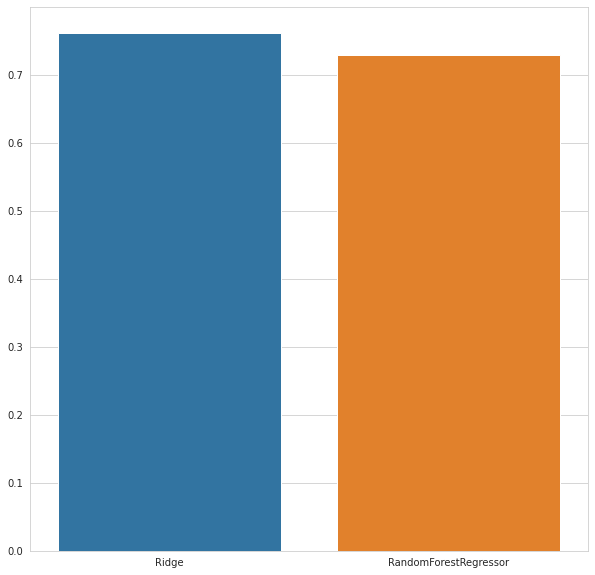

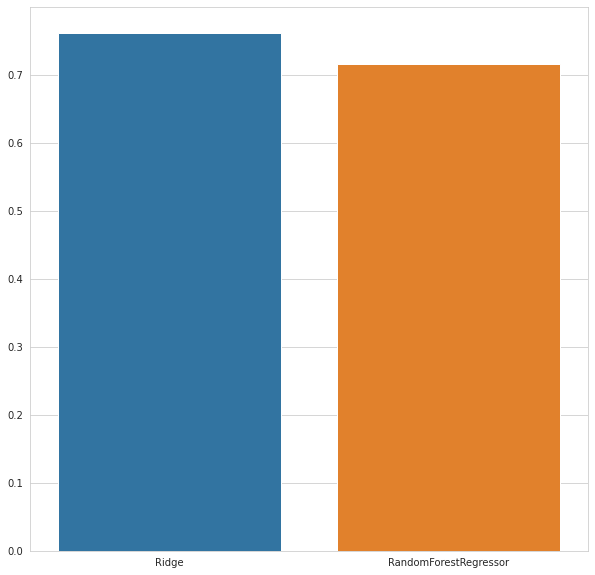

In [92]:
p1 = sns.barplot(x=list(score['RegressorChain'].keys()), y=list(score['RegressorChain'].values()))
plt.show()

p2 = sns.barplot(x=list(score['MultiOutputRegressor'].keys()), y=list(score['MultiOutputRegressor'].values()))
plt.show()

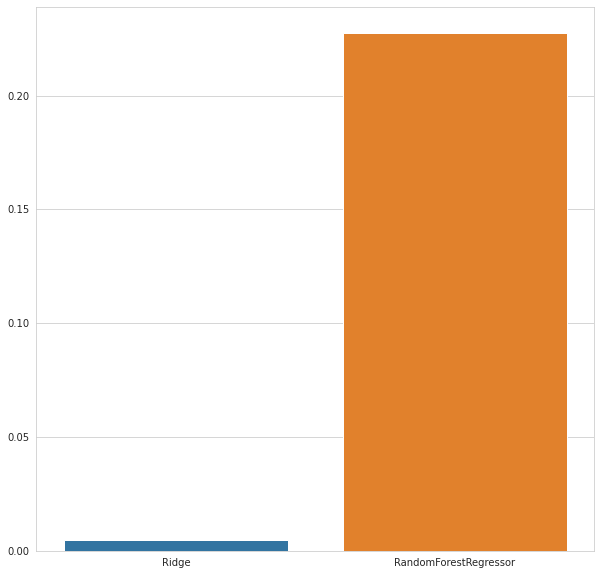

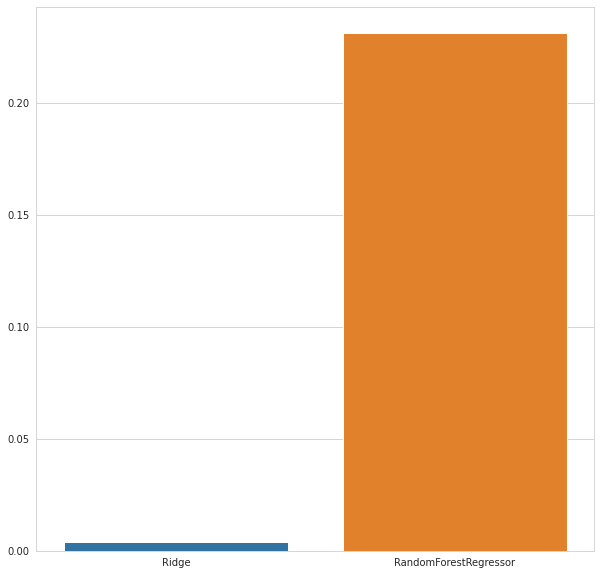

In [93]:
p1 = sns.barplot(x=list(timee['RegressorChain'].keys()), y=list(timee['RegressorChain'].values()))
plt.show()

p2 = sns.barplot(x=list(timee['MultiOutputRegressor'].keys()), y=list(timee['MultiOutputRegressor'].values()))
plt.show()

Обе стратегии показали приблезительно одинаковый результат randomforest показал результат лучше в RegressorChain но хуже чем Rige в обоих случаях